In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

### Getting data

In [ ]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-01-05 10:37:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2023-01-05 10:37:26 (64.2 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv")
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.columns

Index(['Currency', 'Date', 'Closing Price (USD)', '24h Open (USD)',
       '24h High (USD)', '24h Low (USD)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Date                 2787 non-null   object 
 2   Closing Price (USD)  2787 non-null   float64
 3   24h Open (USD)       2787 non-null   float64
 4   24h High (USD)       2787 non-null   float64
 5   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(2)
memory usage: 130.8+ KB


In [ ]:
len(df)

2787

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(
    columns={"Closing Price (USD)": "Price"})
bitcoin_prices

,Price
0,123.654990
1,125.455000
2,108.584830
3,118.674660
4,121.338660
...,...
2782,49764.132082
2783,50032.693137
2784,47885.625255
2785,45604.615754


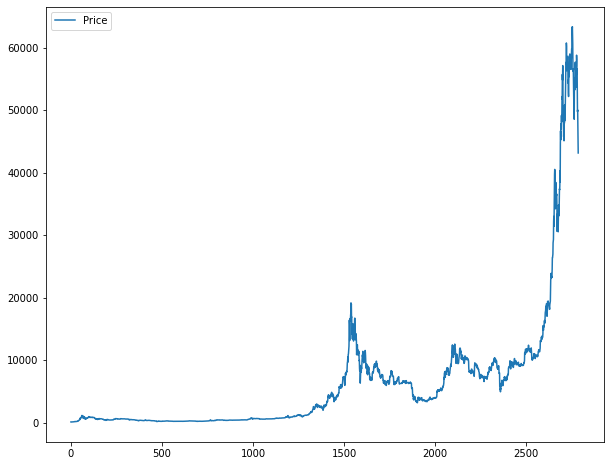

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,8))

## Create a train and test sets 

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [ ]:
timesteps, prices

(array([   0,    1,    2, ..., 2784, 2785, 2786]),
 array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [ ]:
def plot_timeseries(X_1,y_1,X_2,y_2):
  plt.figure(figsize=(10,10))
  plt.scatter(X_1,y_1,label="Train",s=7, color="blue")
  plt.scatter(X_2,y_2,label="Test", s=7, color="red")
  plt.legend(fontsize=15)
  plt.show()

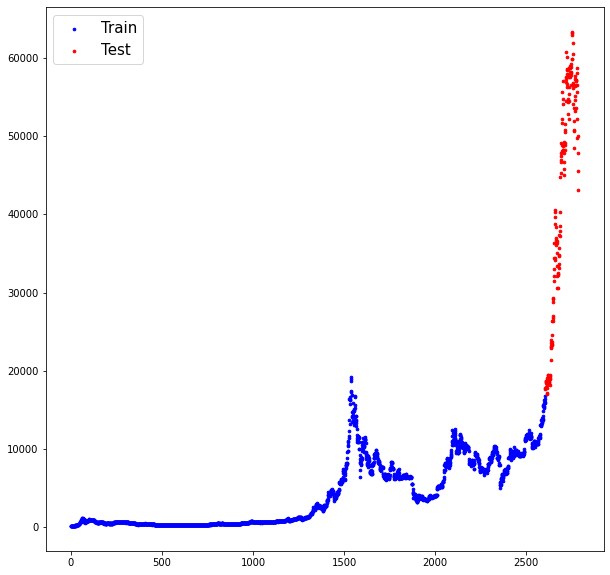

In [ ]:
SPLIT_SIZE = int(0.935 *len(prices))
X_train, y_train = timesteps[:SPLIT_SIZE], prices[:SPLIT_SIZE]
X_test, y_test = timesteps[SPLIT_SIZE:], prices[SPLIT_SIZE:]

plot_timeseries(X_train,y_train,X_test,y_test)


### Model 0: Naive forecast(baseline)

$$ \hat {y}_{t} = y_{t-1} $$

In [ ]:
### Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast.shape, X_test.shape

((181,), (182,))

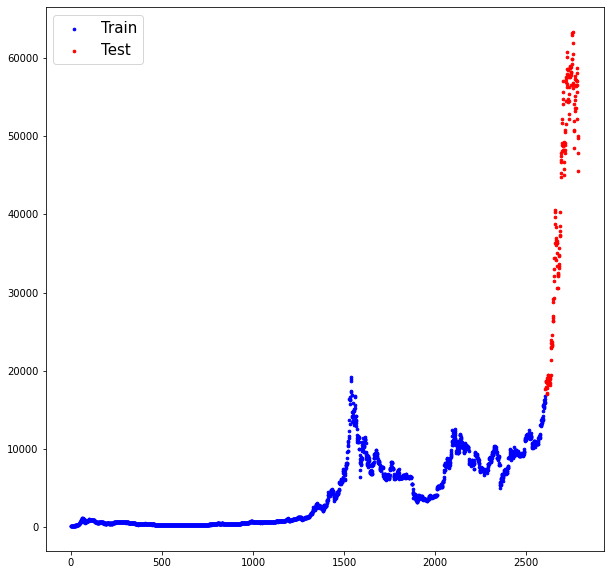

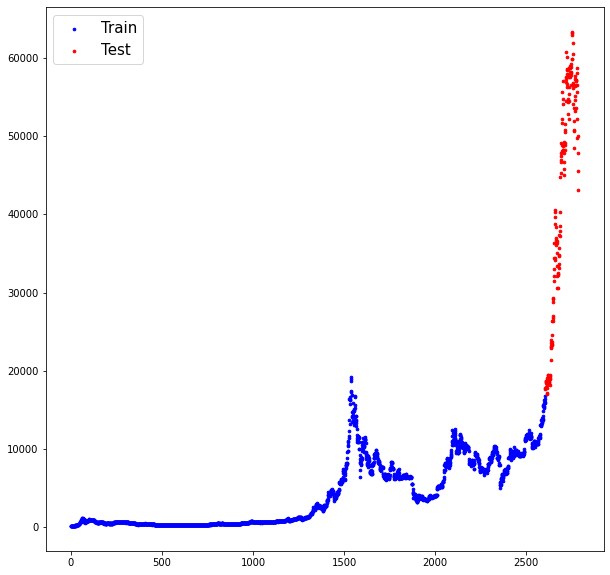

In [ ]:

plot_timeseries(X_train,y_train,X_test[1:],naive_forecast)
plot_timeseries(X_train,y_train,X_test,y_test)

### MASE

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
    Implement MASE(assuming no seasonality)
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9954734002425253